In [2]:
%matplotlib ipympl

In [3]:
import mpl_interactions.ipyplot as iplt

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [132]:
freqs = np.loadtxt('freqcol_TIC174899989.dat')
snr = np.loadtxt('SNR_TIC17489989.dat')

In [140]:
# Upper and lower limits for the frequency list
llim = 20.0
ulim = 50.0
freqind = (freqs > llim) & (freqs<ulim)

In [141]:
freqs = freqs[ freqind ]
snr = snr[ freqind ]

In [142]:
dnu = np.linspace(0.05, 8.05, 2000)

In [138]:
# define the function modulus dnu
def fun(dnu, **kwargs):
    return freqs % dnu

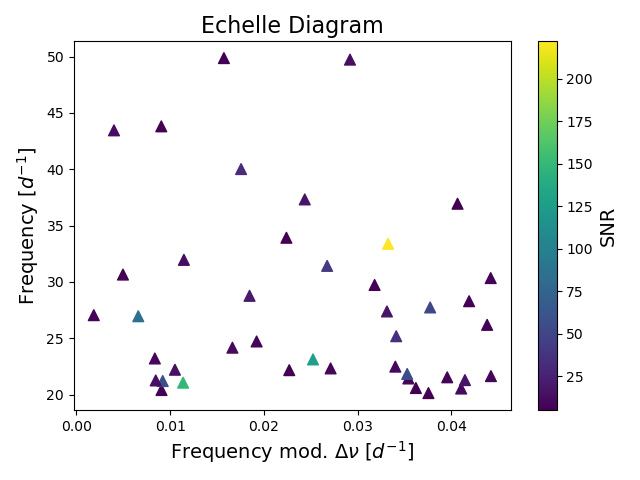

In [145]:
# make the interactive figure 
# Plot the echelle diagram
fig, ax = plt.subplots()
controls = iplt.scatter(
    fun, 
    freqs, 
    dnu=dnu, 
    c=snr, 
    cmap='viridis', 
    s=60, 
    ylim="auto",
    marker='^')
plt.colorbar().set_label(label='SNR', size=14)
ax.set_xlabel(r'Frequency mod. $\Delta \nu$ [$d^{-1}$]', fontsize=14)
ax.set_ylabel(r'Frequency [$d^{-1}$]', fontsize=14)
ax.set_title('Echelle Diagram', fontsize=16)
#plt.grid(True)
fig.tight_layout()